# Predictive Modelling of Sales Data

We will create a machine learning model to predict whether the next product sold will be paid or unpaid. 

## Introduction:
This fake dataset is generated to illustrate essential data science techniques for developing a predictive model. The dataset is related to some sales transactions from a fictitious store. The columns of the dataset are as follows:

    - Order ID: This represents the identifier for each order. 
    - Product Name: The name of the product being sold. 
    - Quantity: The number of items for the particular product in the order.
    - Price: The price of the product. 
    - Is Paid: An indicator of whether the order has been paid for.
    
The dataset contains some messy or missing data. Given the presence of messy data, a cleaning process would be beneficial before performing any analysis or developing models based on this dataset. 

In [ ]:
!pip install -q pandas
import pandas as pd
# Download the dataset
url = 'https://raw.githubusercontent.com/dave2k77/predicting_sales_model/main/fake_messy_sales_dataset.csv'
df = pd.read_csv(url)
# Display the first few rows of the dataset
df.head()

In [ ]:
# Convert the 'Price' column to string type for analysis
df['Price'] = df['Price'].astype(str)
# Re-run the analysis
# Count the number of improbable values in the 'Price' column (e.g., 'invalid')
improbable_values = df['Price'].apply(lambda x: not x.replace('.', '', 1).isnumeric()).sum()
# Get the shape of the dataframe to find the total number of rows and columns
total_rows, total_columns = df.shape
# Count the number of missing values in each column
missing_values = df.isnull().sum()
# Count the number of duplicate rows
duplicate_rows = df.duplicated().sum()
total_rows, total_columns, missing_values, duplicate_rows, improbable_values

(100,
 5,
 Order ID        8
 Product Name    6
 Quantity        5
 Price           0
 Is Paid         5
 dtype: int64,
 0,
 14)

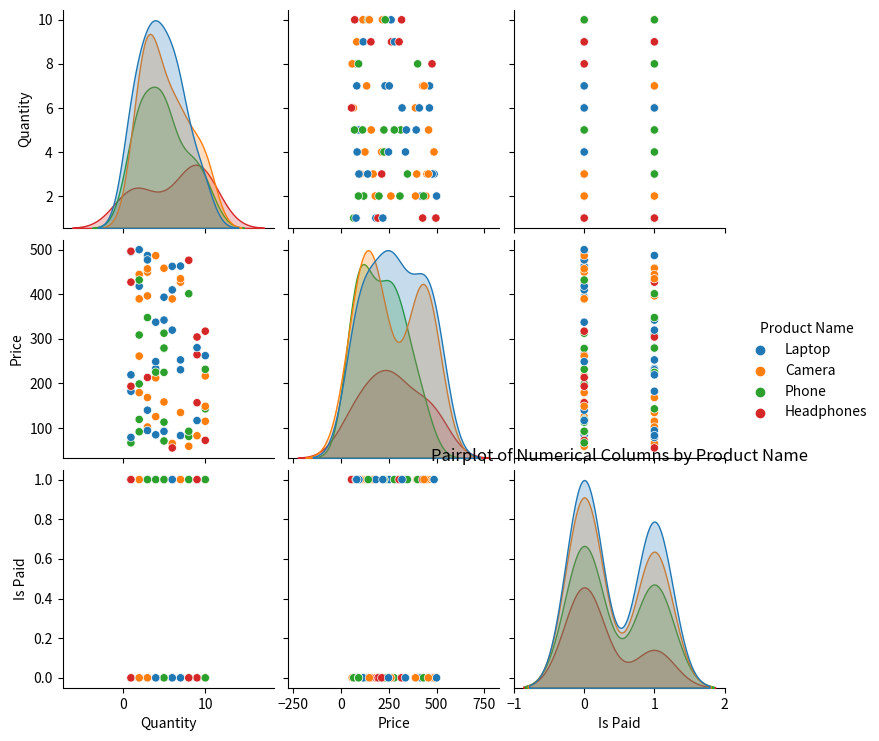

In [ ]:
!pip install -q matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# Convert columns to appropriate data types for plotting
# We'll ignore rows with missing or improbable values for this visualization
df_clean = df.dropna().copy()
df_clean = df_clean[df_clean['Price'].apply(lambda x: x.replace('.', '', 1).isnumeric())]
df_clean['Price'] = df_clean['Price'].astype(float)
df_clean['Quantity'] = df_clean['Quantity'].astype(int)
df_clean['Is Paid'] = df_clean['Is Paid'].astype(int)
# Create a pairplot to visualize relationships between numerical columns
sns.pairplot(df_clean, hue='Product Name', diag_kind='kde')
plt.title('Pairplot of Numerical Columns by Product Name')
plt.show()

In [ ]:
# Calculate descriptive statistics for the cleaned dataset
five_point_summary = df_clean.describe(include='all')
# Calculate standard deviation for numerical columns
std_deviation = df_clean.std()
# Calculate skewness for numerical columns
skewness = df_clean.skew()
# Calculate kurtosis for numerical columns
kurtosis = df_clean.kurt()
five_point_summary, std_deviation, skewness, kurtosis

(       Order ID Product Name   Quantity       Price    Is Paid
 count        81           81  81.000000   81.000000  81.000000
 unique       81            4        NaN         NaN        NaN
 top          43       Laptop        NaN         NaN        NaN
 freq          1           27        NaN         NaN        NaN
 mean        NaN          NaN   5.049383  260.073260   0.407407
 std         NaN          NaN   2.858764  142.665970   0.494413
 min         NaN          NaN   1.000000   55.326816   0.000000
 25%         NaN          NaN   3.000000  125.604128   0.000000
 50%         NaN          NaN   5.000000  233.186031   0.000000
 75%         NaN          NaN   7.000000  396.365063   1.000000
 max         NaN          NaN  10.000000  499.991092   1.000000,
 Quantity      2.858764
 Price       142.665970
 Is Paid       0.494413
 dtype: float64,
 Quantity    0.317694
 Price       0.215567
 Is Paid     0.384038
 dtype: float64,
 Quantity   -1.086847
 Price      -1.322989
 Is Paid    -1.

In [ ]:
# Calculate the number of each product sold
product_sales_count = df_clean['Product Name'].value_counts()
# Calculate the relative percentage of orders that were paid compared to unpaid
paid_vs_unpaid = df_clean['Is Paid'].value_counts(normalize=True) * 100
# Calculate the correlation matrix to find any notable correlation between features
correlation_matrix = df_clean.corr()
product_sales_count, paid_vs_unpaid, correlation_matrix

(Laptop        27
 Camera        24
 Phone         19
 Headphones    11
 Name: Product Name, dtype: int64,
 0    59.259259
 1    40.740741
 Name: Is Paid, dtype: float64,
           Quantity     Price   Is Paid
 Quantity  1.000000 -0.211119  0.029807
 Price    -0.211119  1.000000 -0.102500
 Is Paid   0.029807 -0.102500  1.000000)

In [ ]:
# Step 1: Remove duplicate rows (if any)
df_cleaned = df.drop_duplicates()
# Step 2: Handle missing values - We'll use median imputation for numerical columns and mode imputation for categorical columns
for col in df_cleaned.select_dtypes(include=['object']).columns:
    mode_val = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_val, inplace=True)
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    median_val = df_cleaned[col].median()
    df_cleaned[col].fillna(median_val, inplace=True)
# Step 3: Deal with outliers - We'll use Z-score method to identify and remove outliers
from scipy import stats
z_scores = stats.zscore(df_cleaned.select_dtypes(include=['float64', 'int64']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_cleaned = df_cleaned[filtered_entries]
# Step 4: Fix inappropriate column names - Replace spaces with underscores and convert to lowercase
df_cleaned.columns = df_cleaned.columns.str.replace(' ', '_').str.lower()
# Save the cleaned dataset to a CSV file
cleaned_csv_path = 'cleaned_sales_data.csv'
df_cleaned.to_csv(cleaned_csv_path, index=False)
cleaned_csv_path

'cleaned_sales_data.csv'

In [ ]:
# Convert 'quantity' and 'price' columns to numerical data types
df_cleaned['quantity'] = pd.to_numeric(df_cleaned['quantity'], errors='coerce')
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
# Drop any rows that could not be converted to numerical values
df_cleaned.dropna(subset=['quantity', 'price'], inplace=True)
# Re-run the feature engineering and transformation steps
# Step 1: Create a feature for the total cost of the order (Quantity * Price)
df_cleaned['total_cost'] = df_cleaned['quantity'] * df_cleaned['price']
# Step 2: Normalize the numerical columns using Z-score normalization
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_cols] = (df_cleaned[numerical_cols] - df_cleaned[numerical_cols].mean()) / df_cleaned[numerical_cols].std()
# Step 3: Encode the categorical columns using one-hot encoding
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)
# Save the transformed dataset to a CSV file
transformed_csv_path = 'transformed_sales_data.csv'
df_cleaned.to_csv(transformed_csv_path, index=False)
transformed_csv_path

'transformed_sales_data.csv'

In [ ]:
from sklearn.model_selection import train_test_split
# Define the feature set X and the target variable y
X = df_cleaned.drop('is_paid', axis=1)
y = df_cleaned['is_paid']
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Save the training and test sets to CSV files
train_csv_path = 'training_data.csv'
test_csv_path = 'test_data.csv'
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.to_csv(train_csv_path, index=False)
test_data.to_csv(test_csv_path, index=False)
train_csv_path, test_csv_path

('training_data.csv', 'test_data.csv')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import joblib
# Initialize the baseline model - Logistic Regression
baseline_model = LogisticRegression(random_state=42)
# Perform k-fold cross-validation (k=5 by default)
cv_scores = cross_val_score(baseline_model, X_train, y_train, cv=5)
# Train the baseline model on the entire training set
baseline_model.fit(X_train, y_train)
# Save the trained model for future use
model_path = 'baseline_model.pkl'
joblib.dump(baseline_model, model_path)
cv_scores.mean(), model_path

(0.567032967032967, 'baseline_model.pkl')

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Initialize the more complex models: Random Forest and Gradient Boosting
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
gradient_boosting_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
# Perform k-fold cross-validation (k=5 by default) for Random Forest
rf_cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)
# Perform k-fold cross-validation (k=5 by default) for Gradient Boosting
gb_cv_scores = cross_val_score(gradient_boosting_model, X_train, y_train, cv=5)
# Train the Random Forest model on the entire training set
random_forest_model.fit(X_train, y_train)
# Train the Gradient Boosting model on the entire training set
gradient_boosting_model.fit(X_train, y_train)
# Save the trained models for future use
rf_model_path = 'random_forest_model.pkl'
gb_model_path = 'gradient_boosting_model.pkl'
joblib.dump(random_forest_model, rf_model_path)
joblib.dump(gradient_boosting_model, gb_model_path)
rf_cv_scores.mean(), gb_cv_scores.mean(), rf_model_path, gb_model_path

(0.521978021978022,
 0.4461538461538462,
 'random_forest_model.pkl',
 'gradient_boosting_model.pkl')

In [ ]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter grid for Random Forest
rf_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
# Hyperparameter grid for Gradient Boosting
gb_param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
# Grid search for Random Forest
rf_grid_search = GridSearchCV(random_forest_model, rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
# Grid search for Gradient Boosting
gb_grid_search = GridSearchCV(gradient_boosting_model, gb_param_grid, cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
# Extract the best models and scores
best_rf_model = rf_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_
best_rf_score = rf_grid_search.best_score_
best_gb_score = gb_grid_search.best_score_
# Save the optimized models for future use
optimized_rf_model_path = 'optimized_random_forest_model.pkl'
optimized_gb_model_path = 'optimized_gradient_boosting_model.pkl'
joblib.dump(best_rf_model, optimized_rf_model_path)
joblib.dump(best_gb_model, optimized_gb_model_path)
best_rf_score, best_gb_score, optimized_rf_model_path, optimized_gb_model_path

(0.5824175824175823,
 0.5373626373626373,
 'optimized_random_forest_model.pkl',
 'optimized_gradient_boosting_model.pkl')

In [ ]:
# Check the status of the optimization results
try:
    best_rf_score, best_gb_score, optimized_rf_model_path, optimized_gb_model_path
except NameError:
    'Optimization is still in progress.'

In [ ]:
!pip install -q torch torchvision

In [ ]:
# Import necessary libraries for building the neural network with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold
import numpy as np
# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values)
# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 1)
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))
        return x
# Initialize the neural network
nn_model = NeuralNetwork()
# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)
# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# List to store cross-validation scores
nn_cv_scores = []
# Perform k-fold cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]
    train_loader = DataLoader(TensorDataset(X_train_fold, y_train_fold), batch_size=32, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val_fold, y_val_fold), batch_size=32)
    for epoch in range(10):
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            output = nn_model(batch_X).squeeze()
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()
    val_loss = 0
    val_count = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            output = nn_model(batch_X).squeeze()
            val_loss += criterion(output, batch_y).item()
            val_count += 1
    nn_cv_scores.append(val_loss / val_count)
# Average cross-validation score
avg_nn_cv_score = np.mean(nn_cv_scores)
# Save the trained neural network model
torch.save(nn_model.state_dict(), 'neural_network_model.pth')
avg_nn_cv_score, 'neural_network_model.pth'

(0.4371103495359421, 'neural_network_model.pth')